In [1]:
import pandas as pd
pip install category_encoders

file_path = 'Final_excel.xlsx'  
data = pd.read_excel(file_path)
data=data.drop(['Time','Product Type','Unit Sales'],axis=1)
data = data[data['Geography'] != "Total US - Multi Outlet + Conv"]

In [2]:
if data.isna().any().any():
    print("The dataset contains missing values.")
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


In [3]:
column_names = data.columns

print(column_names)
data.dtypes

Index(['Geography', 'Product', 'Dollar Sales', 'Price per Unit', 'Package',
       'Total Ounces', 'Form', 'Flavor / Scent', 'Month', 'Year', 'Season'],
      dtype='object')


Geography          object
Product            object
Dollar Sales      float64
Price per Unit    float64
Package            object
Total Ounces      float64
Form               object
Flavor / Scent     object
Month               int64
Year                int64
Season             object
dtype: object

In [4]:
import pandas as pd

df1 = data
df=df1[['Dollar Sales','Price per Unit','Total Ounces','Month']]
correlation_matrix = df.corr()

print(correlation_matrix)

                Dollar Sales  Price per Unit  Total Ounces     Month
Dollar Sales        1.000000       -0.125863      0.000784 -0.036050
Price per Unit     -0.125863        1.000000      0.867852  0.026222
Total Ounces        0.000784        0.867852      1.000000 -0.021980
Month              -0.036050        0.026222     -0.021980  1.000000


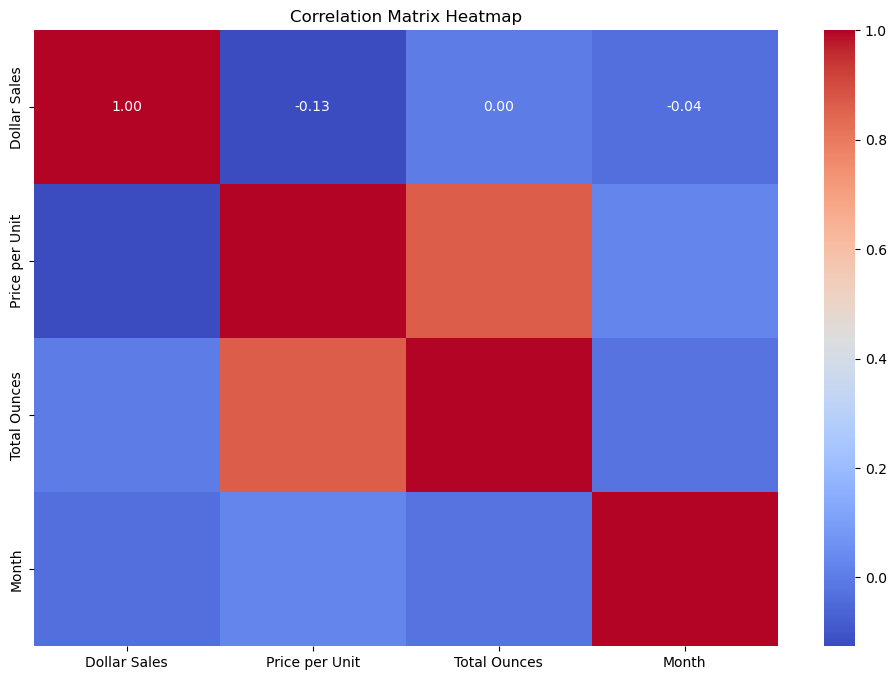

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title("Correlation Matrix Heatmap")
plt.show()

C:\Users\ivanc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


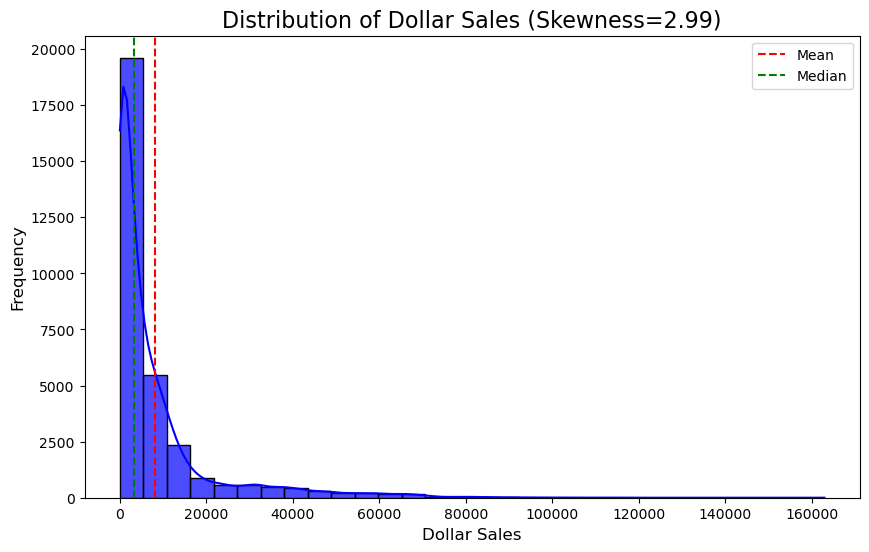

C:\Users\ivanc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


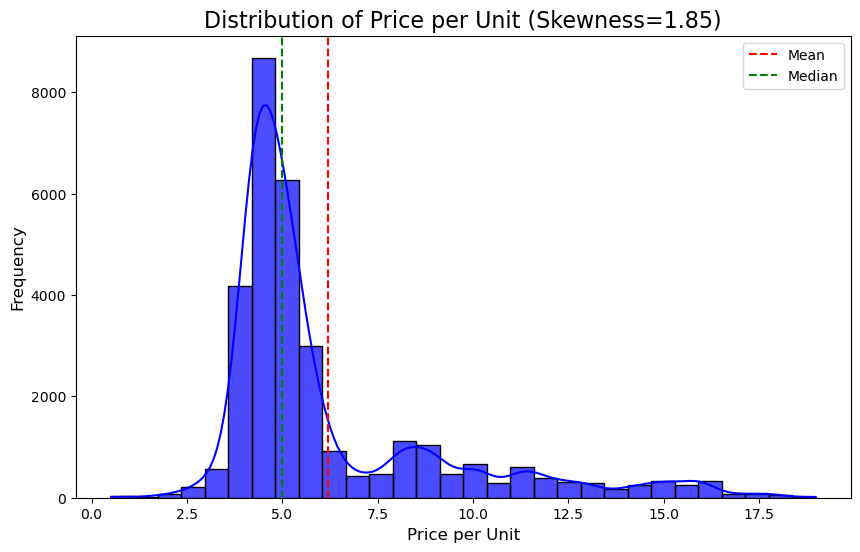

C:\Users\ivanc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


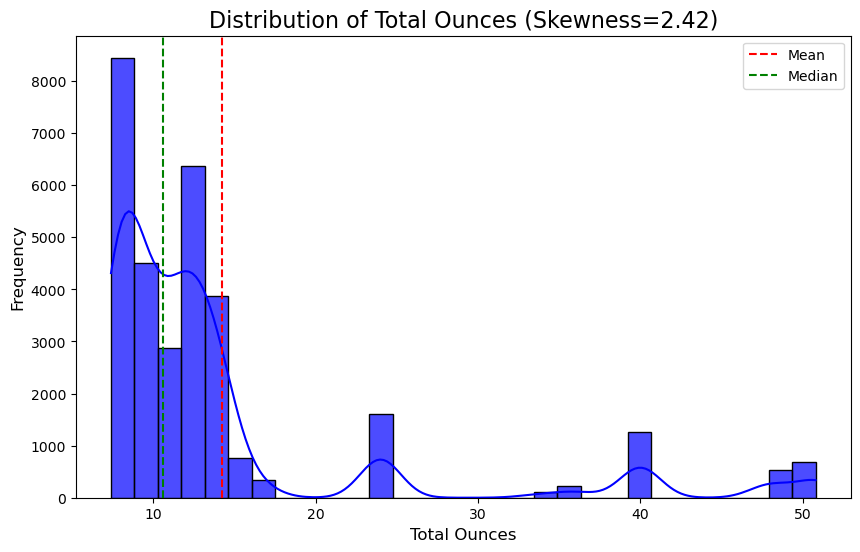

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Y_train is target variable
def plot_skewness(data, column_name):
    plt.figure(figsize=(10, 6))

    # Histogram
    sns.histplot(data[column_name], kde=True, bins=30, color='blue', alpha=0.7)
    plt.axvline(data[column_name].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(data[column_name].median(), color='green', linestyle='--', label='Median')
    plt.title(f"Distribution of {column_name} (Skewness={data[column_name].skew():.2f})", fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend()
    plt.show()

# Plot
plot_skewness(data, 'Dollar Sales')
plot_skewness(data, 'Price per Unit')
plot_skewness(data, 'Total Ounces')

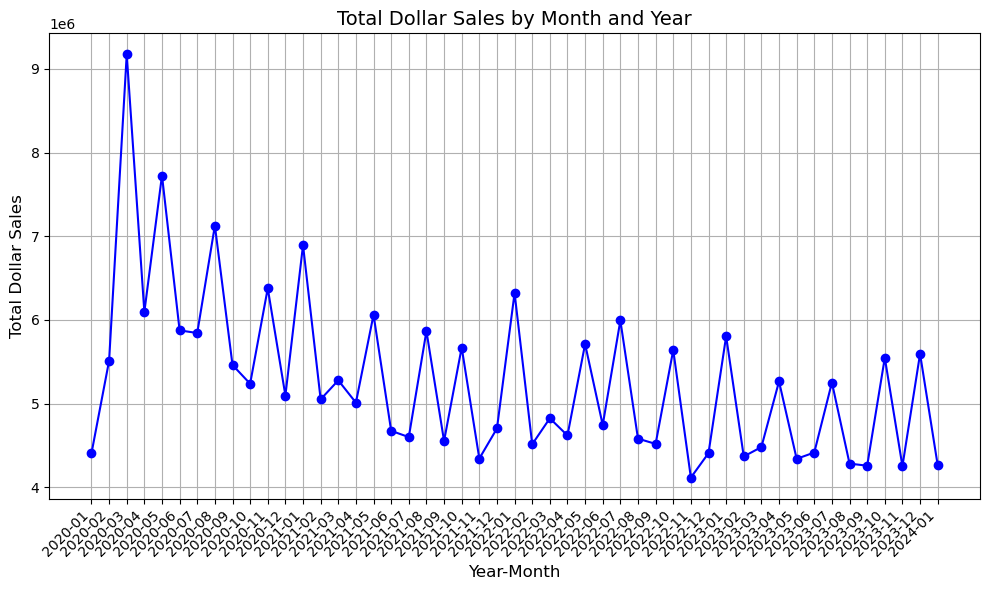

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df=data
df_grouped = df.groupby(['Year', 'Month'])['Dollar Sales'].sum().reset_index()

df_grouped['Year-Month'] = df_grouped['Year'].astype(str) + '-' + df_grouped['Month'].astype(str).str.zfill(2)

plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Year-Month'], df_grouped['Dollar Sales'], marker='o', color='b')


plt.title('Total Dollar Sales by Month and Year', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Dollar Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  

plt.grid(True)
plt.tight_layout()
plt.show()


Mean Absolute Error: 4605.59
R² Score (Test): 0.75
Training R² Score: 0.78
Test R² Score: 0.75


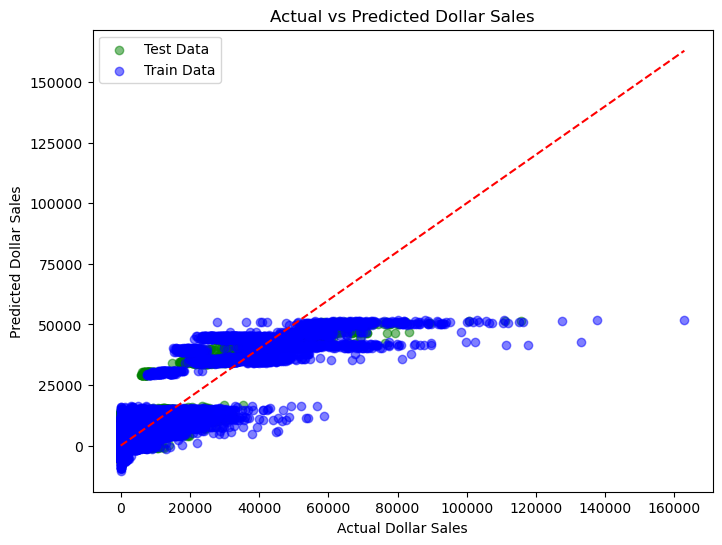

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder


df = data  


categorical_features = ['Product', 'Package', 'Form', 'Flavor / Scent', 'Season', 'Geography']


encoder = TargetEncoder()
for col in categorical_features:
    df[col] = encoder.fit_transform(df[col], df['Dollar Sales'])


df.sort_values(by=['Year', 'Month'], ascending=True, inplace=True)


train_data = df[:int(0.7 * len(df))]  
test_data = df[int(0.7 * len(df)):]   


X_train = train_data[['Price per Unit', 'Total Ounces'] + categorical_features]
y_train = train_data['Dollar Sales']

X_test = test_data[['Price per Unit', 'Total Ounces'] + categorical_features]
y_test = test_data['Dollar Sales']


scaler_features = StandardScaler()
scaler_target = StandardScaler()


X_train_scaled = scaler_features.fit_transform(X_train)
X_test_scaled = scaler_features.transform(X_test)


y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1)).flatten()


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


y_pred_train_scaled = model.predict(X_train_scaled)
y_pred_test_scaled = model.predict(X_test_scaled)


y_train_pred_original = scaler_target.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_test_pred_original = scaler_target.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()

y_train_original = scaler_target.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_target.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()


mse = mean_squared_error(y_test_original, y_test_pred_original)
mae=mean_absolute_error(y_test_original, y_test_pred_original)
r2 = r2_score(y_test_original, y_test_pred_original)

train_r2 = r2_score(y_train_original, y_train_pred_original)  # Calculate R² for train data
test_r2 = r2_score(y_test_original, y_test_pred_original)     # Calculate R² for test data

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score (Test): {r2:.2f}")
print(f"Training R² Score: {train_r2:.2f}")
print(f"Test R² Score: {test_r2:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_test_pred_original, color='green', alpha=0.5, label="Test Data")
plt.scatter(y_train_original, y_train_pred_original, color='blue', alpha=0.5, label="Train Data")
plt.plot([min(y_test_original.min(), y_train_original.min()), max(y_test_original.max(), y_train_original.max())], 
         [min(y_test_original.min(), y_train_original.min()), max(y_test_original.max(), y_train_original.max())], 
         color='red', linestyle='--')
plt.xlabel('Actual Dollar Sales')
plt.ylabel('Predicted Dollar Sales')
plt.title('Actual vs Predicted Dollar Sales')
plt.legend()
plt.show()
